In [283]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [284]:
df = pd.read_csv('water_potability.csv')

In [285]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [286]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [287]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
ph                 2785 non-null float64
Hardness           3276 non-null float64
Solids             3276 non-null float64
Chloramines        3276 non-null float64
Sulfate            2495 non-null float64
Conductivity       3276 non-null float64
Organic_carbon     3276 non-null float64
Trihalomethanes    3114 non-null float64
Turbidity          3276 non-null float64
Potability         3276 non-null int64
dtypes: float64(9), int64(1)
memory usage: 256.0 KB


In [289]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [290]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [291]:
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

In [292]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [293]:
df.shape

(3276, 10)

In [294]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(2666, 10)

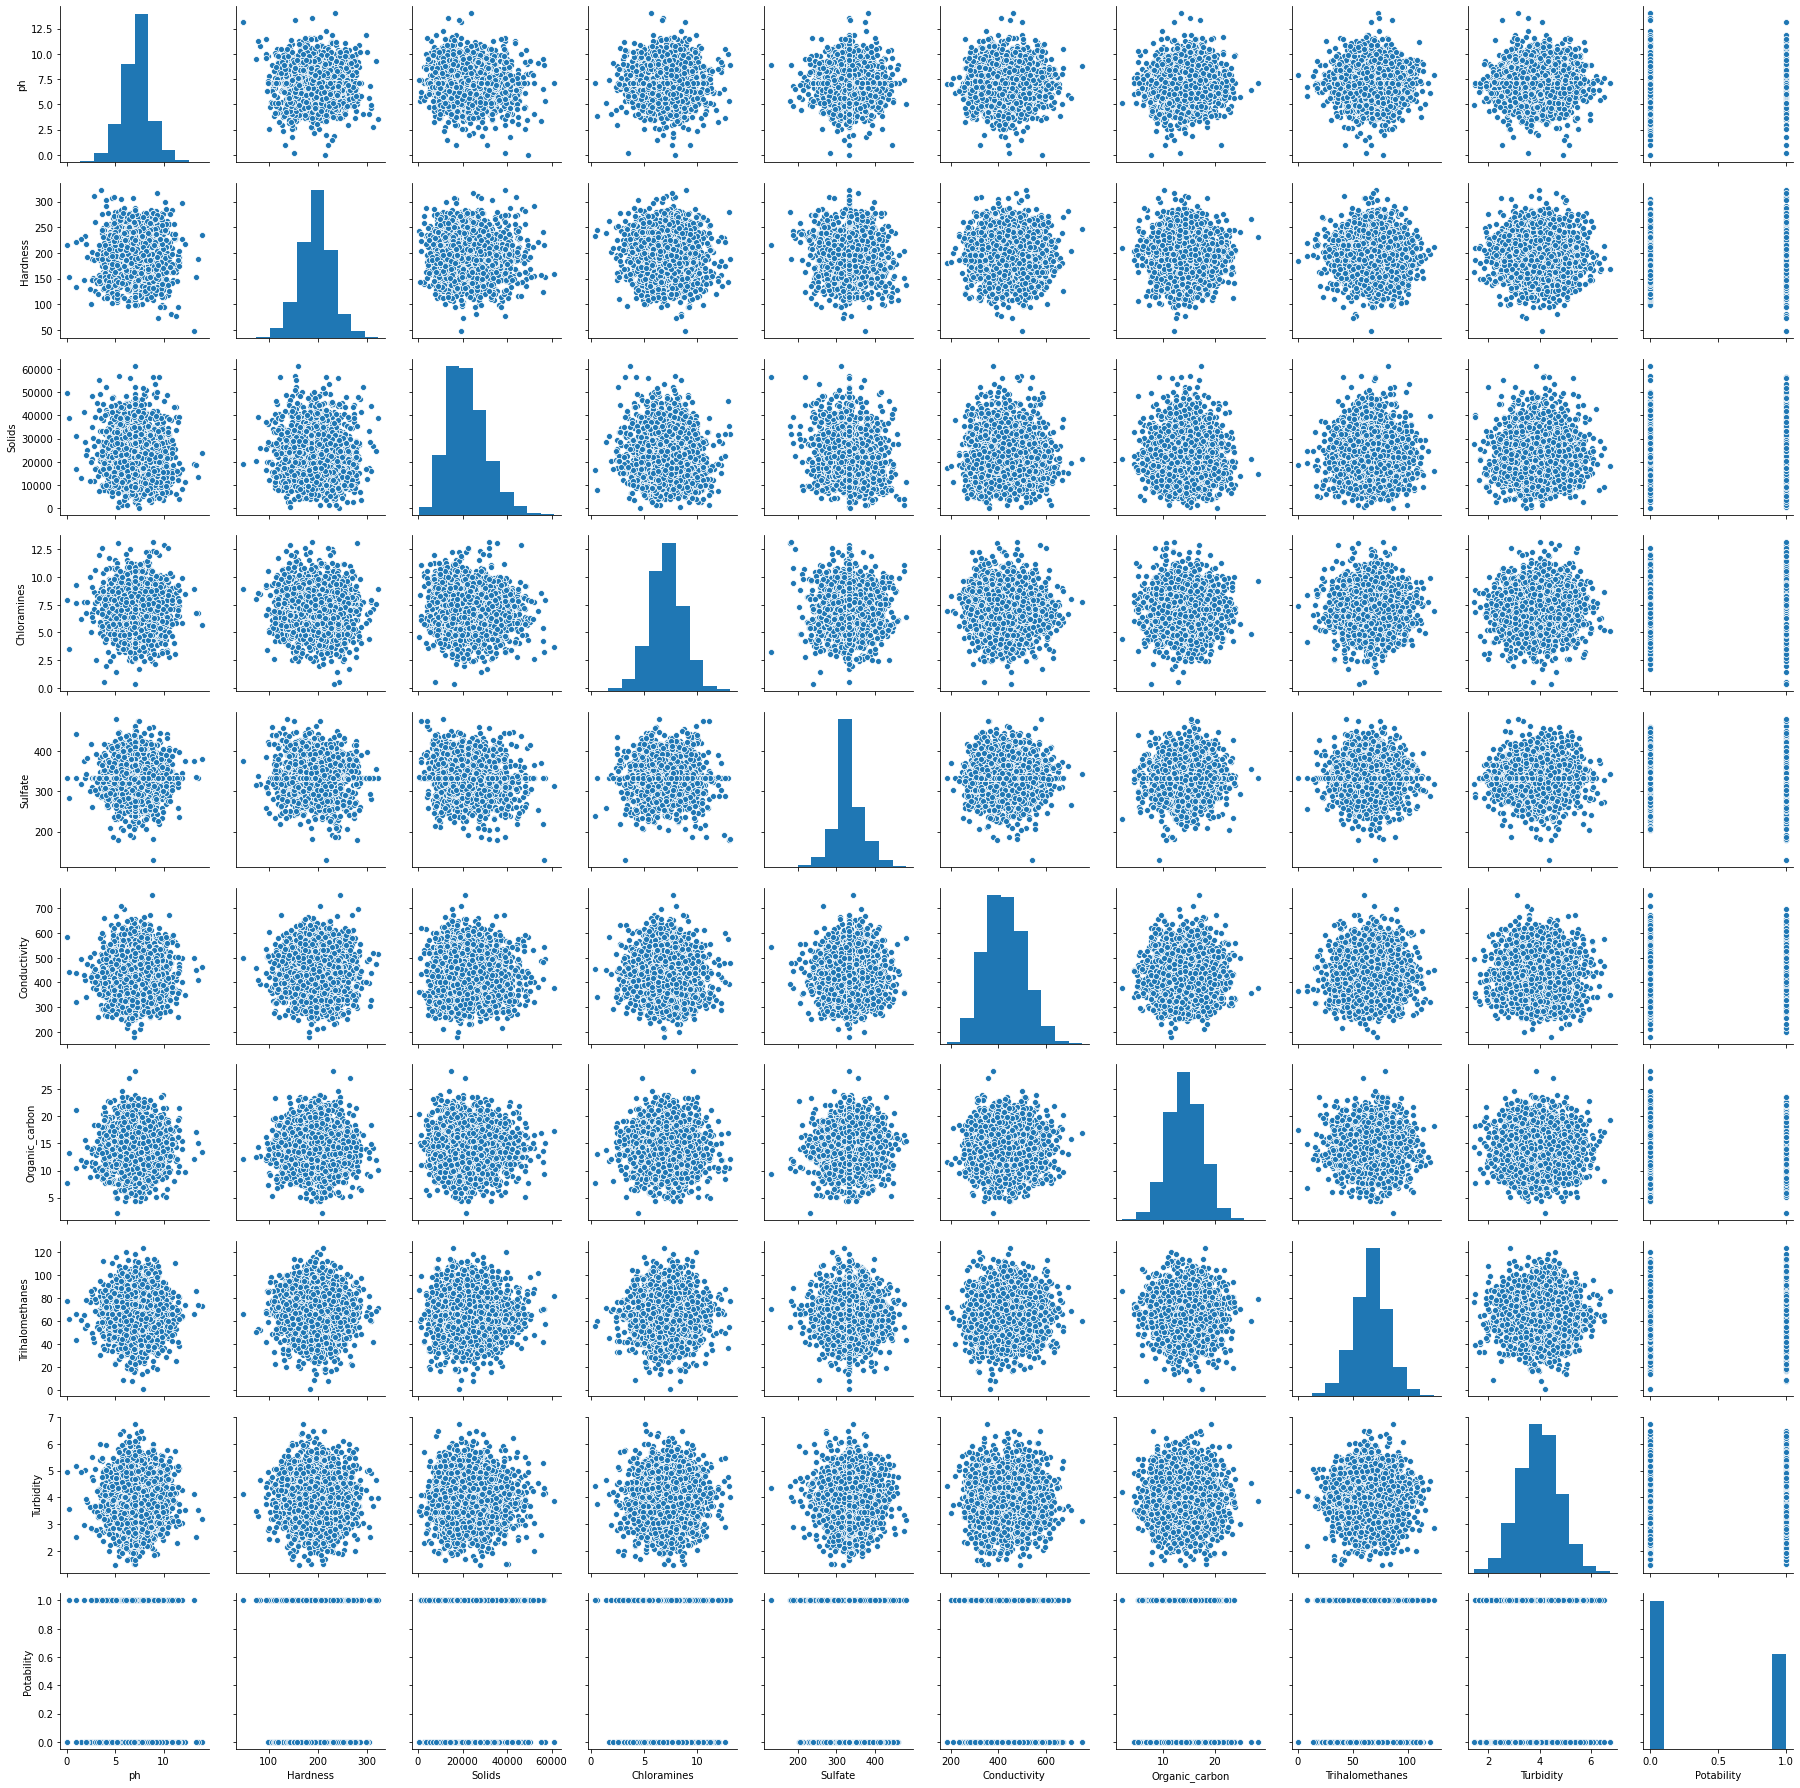

In [295]:
sns.pairplot(df, kind='scatter')

<AxesSubplot:>

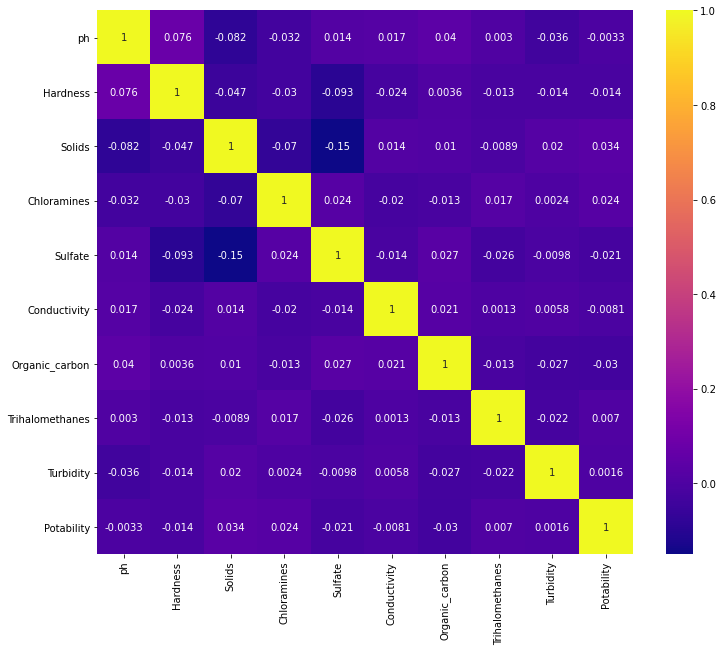

In [296]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df.corr(),cmap='plasma', annot=True)

In [298]:
X = df.drop(columns='Potability', axis=1)
y = df['Potability']

In [299]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [300]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1580,6.129070,198.021095,22207.482865,7.387451,333.775777,464.851322,14.028602,61.446945,3.837639
530,6.641501,198.884409,27867.486757,7.327729,318.408397,573.723762,13.191720,81.551114,4.694311
2196,8.616824,228.762945,19126.298537,7.017578,327.894821,383.527023,14.759257,41.275927,4.584566
49,8.757257,200.191400,21536.224687,4.915101,317.882900,404.717799,13.768323,47.930872,3.626135
858,6.495435,252.010903,32775.632585,8.479302,333.775777,330.045052,9.854011,80.561077,3.390471
1072,7.080795,172.731433,28894.476970,4.250917,244.285145,559.629340,21.340849,51.274712,2.959750
719,7.080795,160.325972,37795.763318,9.152225,390.276608,441.986106,16.450990,21.355275,4.441980
2401,4.083595,201.938643,20555.965489,1.920271,341.597153,435.511529,12.226676,69.289779,2.974871
3041,6.711815,232.206428,23936.275332,6.619088,333.775777,463.510297,13.911879,78.190897,3.413647
2460,8.848103,248.567740,19793.971867,9.681154,323.351749,411.147433,18.137805,68.753074,3.074799


<AxesSubplot:xlabel='Potability', ylabel='count'>

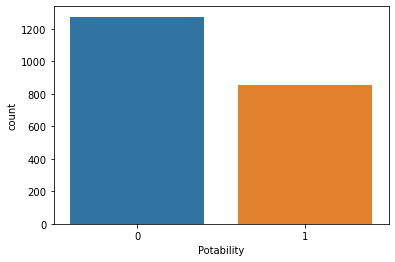

In [301]:
sns.countplot(x=y_train)

In [276]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_data = scaler.transform(X_train)

In [191]:
scaled_data

array([[ 0.35329982,  0.47411639,  0.26547456, ...,  1.18380656,
        -0.9063429 ,  0.65215374],
       [ 1.32989796,  1.57472124,  0.17352147, ...,  1.37752046,
         0.23795534, -0.11013481],
       [ 0.56875154,  0.30586745,  1.60555544, ...,  1.57867343,
         0.96166628,  0.83065453],
       ...,
       [-0.85693997,  1.03946559, -1.09697454, ..., -2.22692818,
        -1.70185717, -0.47651859],
       [ 0.00651023, -0.09739247,  2.09734622, ..., -0.16540372,
        -0.39816913, -0.78778001],
       [ 0.68383821, -0.34611154,  1.34633426, ...,  1.7413866 ,
        -1.31528919,  0.64388004]])

In [192]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [193]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('lg_model', LogisticRegression())])
# pipe1.fit(X_train, y_train)
# pipe1.score(X_test, y_test)
lg_score = cross_val_score(pipe1, X, y, cv=5)
lg_score.mean()

0.6267814856195234

In [279]:
pipe2 = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])
# pipe2.fit(X_train, y_train)
# pipe2.score(X_test, y_test)
rf_score = cross_val_score(pipe2, X, y, cv=5)
rf_score.mean()

1.0

In [195]:
pipe3 = Pipeline([('scaler', StandardScaler()), ('gnb', GaussianNB())])
# pipe3.fit(X_train, y_train)
# pipe3.score(X_test, y_test)
gnb_score = cross_val_score(pipe3, X, y, cv=5)
gnb_score.mean()

0.6061590460329842

In [196]:
pipe4 = Pipeline([('scaler', StandardScaler()), ('neigh', KNeighborsClassifier(n_neighbors=8))])
# pipe4.fit(X_train, y_train)
# pipe4.score(X_test, y_test)
knn_score = cross_val_score(pipe4, X, y, cv=5)
knn_score.mean()

0.6091510845964121

In [197]:
pipe5 = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# pipe4.fit(X_train, y_train)
# pipe4.score(X_test, y_test)
svc_score = cross_val_score(pipe5, X, y, cv=5)
svc_score.mean()

0.6339137522749472

In [198]:
svc_score

array([0.61985019, 0.63789869, 0.66228893, 0.59099437, 0.65853659])

In [199]:
rf_score

array([0.60674157, 0.63414634, 0.62664165, 0.58536585, 0.63977486])

In [200]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(), param_grid)

In [201]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [202]:
grid.best_score_

0.6267814856195234

In [203]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [204]:
param_grid = {'max_depth': [3, 5, 10],
               'min_samples_split': [2, 5, 10]}
grid2 = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, cv=5)

In [205]:
grid2.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [206]:
grid2.best_score_

0.6294137487615152

In [207]:
import matplotlib.pyplot as plt

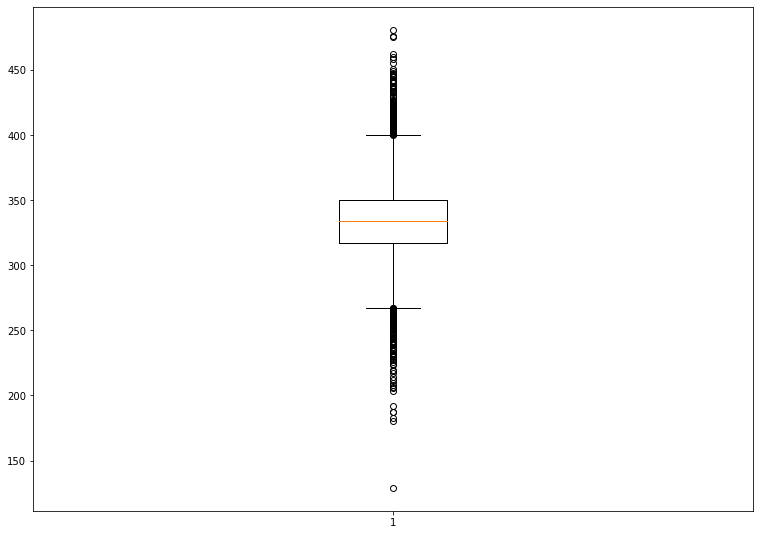

In [255]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(df['Sulfate'])
 
# show plot
plt.show()

In [250]:
RandomForest_Pipeline     = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
AdaBoost_Pipeline         = Pipeline(steps = [('scale',StandardScaler()),('AB',AdaBoostClassifier(random_state=42))])
SVC_Pipeline              = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])

RandomForest_CV_f1     = cross_val_score(RandomForest_Pipeline,X,y,cv=10,scoring='accuracy')
AdaBoost_CV_f1         = cross_val_score(AdaBoost_Pipeline,X,y,cv=10,scoring='accuracy')
SVC_CV_f1              = cross_val_score(SVC_Pipeline,X,y,cv=10,scoring='accuracy')

In [251]:
RandomForest_CV_f1

array([0.66158537, 0.61890244, 0.67378049, 0.66158537, 0.6402439 ,
       0.57012195, 0.59327217, 0.63914373, 0.67584098, 0.6911315 ])

In [252]:
AdaBoost_CV_f1

array([0.63109756, 0.61890244, 0.66158537, 0.62195122, 0.65853659,
       0.50304878, 0.52599388, 0.59021407, 0.6146789 , 0.58409786])

In [253]:
SVC_CV_f1

array([0.6554878 , 0.61585366, 0.68292683, 0.67987805, 0.67073171,
       0.59146341, 0.62385321, 0.63914373, 0.65137615, 0.6911315 ])

In [218]:
#from tune_sklearn  import TuneGridSearchCV

RFBE = RandomForestClassifier(random_state=42)

AdaBoost_Pipeline         = Pipeline(steps = [('scale',StandardScaler()),('AB',AdaBoostClassifier(random_state = 42,
                                                                                                  base_estimator = RFBE))])

AdaBoost_Pipeline.fit(X_train,y_train)

parameters = {'AB__base_estimator__max_depth':[2,3,5],
               'AB__base_estimator__min_samples_leaf':[2,5,10],
               'AB__base_estimator__criterion':['entropy','gini'],
               'AB__base_estimator__bootstrap':[True,False],
               'AB__n_estimators':[5,10,25],
               'AB__learning_rate':[0.01,0.1]}

#ADA_RF_GS  = TuneGridSearchCV(AdaBoost_Pipeline,parameters,cv=3,verbose=1)
ADA_RF_GS  = GridSearchCV(AdaBoost_Pipeline,parameters,cv=3,verbose=10)
ADA_RF_GS.fit(X,y)
print("Best parameter (CV score=%0.3f):" % ADA_RF_GS.best_score_)
print(ADA_RF_GS.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV 1/3; 1/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=5
[CV 1/3; 1/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=5; total time=   1.8s
[CV 2/3; 1/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=5
[CV 2/3; 1/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=5; total time=   1.8s
[CV 3/3; 1/216] START AB__base_estimator__bootstr

[CV 1/3; 7/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=5; total time=   1.9s
[CV 2/3; 7/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=5
[CV 2/3; 7/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=5; total time=   1.7s
[CV 3/3; 7/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=5
[CV 3/3; 7/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimato

[CV 2/3; 13/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=5; total time=   1.6s
[CV 3/3; 13/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=5
[CV 3/3; 13/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=5; total time=   1.6s
[CV 1/3; 14/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=10
[CV 1/3; 14/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__bas

[CV 3/3; 19/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=5; total time=   2.5s
[CV 1/3; 20/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=10
[CV 1/3; 20/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=10; total time=   4.5s
[CV 2/3; 20/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=10
[CV 2/3; 20/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_

[CV 1/3; 26/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=10; total time=   3.9s
[CV 2/3; 26/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=10
[CV 2/3; 26/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=10; total time=   4.5s
[CV 3/3; 26/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=10
[CV 3/3; 26/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base

[CV 2/3; 32/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=10; total time=   4.1s
[CV 3/3; 32/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=10
[CV 3/3; 32/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=10; total time=   4.0s
[CV 1/3; 33/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=25
[CV 1/3; 33/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__

[CV 3/3; 38/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=10; total time=   5.8s
[CV 1/3; 39/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=25
[CV 1/3; 39/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=25; total time=  15.4s
[CV 2/3; 39/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=25
[CV 2/3; 39/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base

[CV 1/3; 45/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=25; total time=  14.5s
[CV 2/3; 45/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=25
[CV 2/3; 45/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=25; total time=  14.2s
[CV 3/3; 45/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=25
[CV 3/3; 45/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base

[CV 2/3; 51/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=25; total time=  15.3s
[CV 3/3; 51/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=25
[CV 3/3; 51/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=25; total time=  15.6s
[CV 1/3; 52/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=5
[CV 1/3; 52/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=entropy, AB__ba

[CV 3/3; 57/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=25; total time=   8.7s
[CV 1/3; 58/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=5
[CV 1/3; 58/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=5; total time=   1.6s
[CV 2/3; 58/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=5
[CV 2/3; 58/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth

[CV 1/3; 64/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=5; total time=   1.4s
[CV 2/3; 64/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=5
[CV 2/3; 64/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=5; total time=   1.3s
[CV 3/3; 64/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=5
[CV 3/3; 64/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2

[CV 2/3; 70/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=5; total time=   1.7s
[CV 3/3; 70/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=5
[CV 3/3; 70/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=5; total time=   1.5s
[CV 1/3; 71/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=10
[CV 1/3; 71/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_de

[CV 3/3; 76/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=5; total time=   1.5s
[CV 1/3; 77/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=10
[CV 1/3; 77/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=10; total time=   3.1s
[CV 2/3; 77/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=10
[CV 2/3; 77/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_dept

[CV 1/3; 83/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=10; total time=   3.1s
[CV 2/3; 83/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=10
[CV 2/3; 83/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=10; total time=   3.1s
[CV 3/3; 83/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=10
[CV 3/3; 83/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_dep

[CV 2/3; 89/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=10; total time=   3.7s
[CV 3/3; 89/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=10
[CV 3/3; 89/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=10; total time=   3.3s
[CV 1/3; 90/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=25
[CV 1/3; 90/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max

[CV 3/3; 95/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=10; total time=   4.5s
[CV 1/3; 96/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=25
[CV 1/3; 96/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=25; total time=  16.6s
[CV 2/3; 96/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=25
[CV 2/3; 96/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_dep

[CV 1/3; 102/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=25; total time=  17.1s
[CV 2/3; 102/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=25
[CV 2/3; 102/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=25; total time=  15.9s
[CV 3/3; 102/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=25
[CV 3/3; 102/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__ma

[CV 2/3; 108/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=25; total time=  15.9s
[CV 3/3; 108/216] START AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=25
[CV 3/3; 108/216] END AB__base_estimator__bootstrap=True, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=25; total time=  16.4s
[CV 1/3; 109/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=5
[CV 1/3; 109/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_es

[CV 3/3; 114/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=25; total time=  16.5s
[CV 1/3; 115/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=5
[CV 1/3; 115/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=5; total time=   3.4s
[CV 2/3; 115/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=5
[CV 2/3; 115/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB

[CV 1/3; 121/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=5; total time=   2.1s
[CV 2/3; 121/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=5
[CV 2/3; 121/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=5; total time=   2.5s
[CV 3/3; 121/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=5
[CV 3/3; 121/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy

[CV 2/3; 127/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=5; total time=   2.9s
[CV 3/3; 127/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=5
[CV 3/3; 127/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=5; total time=   2.9s
[CV 1/3; 128/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=10
[CV 1/3; 128/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, A

[CV 3/3; 133/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=5; total time=   3.3s
[CV 1/3; 134/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=10
[CV 1/3; 134/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=10; total time=   5.7s
[CV 2/3; 134/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=10
[CV 2/3; 134/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy,

[CV 1/3; 140/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=10; total time=   5.0s
[CV 2/3; 140/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=10
[CV 2/3; 140/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=10; total time=   4.9s
[CV 3/3; 140/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=10
[CV 3/3; 140/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=ent

[CV 2/3; 146/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=10; total time=   7.7s
[CV 3/3; 146/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=10
[CV 3/3; 146/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=10; total time=   7.1s
[CV 1/3; 147/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=25
[CV 1/3; 147/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy

[CV 3/3; 152/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=10; total time=   7.0s
[CV 1/3; 153/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=25
[CV 1/3; 153/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=25; total time=  19.3s
[CV 2/3; 153/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=25
[CV 2/3; 153/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy

[CV 1/3; 159/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=25; total time=  18.9s
[CV 2/3; 159/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=25
[CV 2/3; 159/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=25; total time=  18.1s
[CV 3/3; 159/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=entropy, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.01, AB__n_estimators=25
[CV 3/3; 159/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=ent

[CV 2/3; 165/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=25; total time=   7.9s
[CV 3/3; 165/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=25
[CV 3/3; 165/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.01, AB__n_estimators=25; total time=   7.4s
[CV 1/3; 166/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=5
[CV 1/3; 166/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estima

[CV 3/3; 171/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.01, AB__n_estimators=25; total time=   8.0s
[CV 1/3; 172/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=5
[CV 1/3; 172/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=5; total time=   1.4s
[CV 2/3; 172/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=5
[CV 2/3; 172/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator_

[CV 1/3; 178/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=5; total time=   1.7s
[CV 2/3; 178/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=5
[CV 2/3; 178/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=5; total time=   1.6s
[CV 3/3; 178/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=2, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=5
[CV 3/3; 178/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimato

[CV 2/3; 184/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=5; total time=   1.8s
[CV 3/3; 184/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=5
[CV 3/3; 184/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=5; total time=   1.7s
[CV 1/3; 185/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=10
[CV 1/3; 185/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__

[CV 3/3; 190/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=5; total time=   1.7s
[CV 1/3; 191/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=10
[CV 1/3; 191/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=10; total time=   3.5s
[CV 2/3; 191/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=10
[CV 2/3; 191/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator

[CV 1/3; 197/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=10; total time=   3.5s
[CV 2/3; 197/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=10
[CV 2/3; 197/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=10; total time=   3.6s
[CV 3/3; 197/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=3, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=10
[CV 3/3; 197/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_esti

[CV 2/3; 203/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=10; total time=   4.7s
[CV 3/3; 203/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=10
[CV 3/3; 203/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=10; total time=   5.4s
[CV 1/3; 204/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=2, AB__learning_rate=0.1, AB__n_estimators=25
[CV 1/3; 204/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimato

[CV 3/3; 209/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=10; total time=   7.3s
[CV 1/3; 210/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=25
[CV 1/3; 210/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=25; total time=  16.4s
[CV 2/3; 210/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=5, AB__learning_rate=0.1, AB__n_estimators=25
[CV 2/3; 210/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimato

[CV 1/3; 216/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=25; total time=  12.8s
[CV 2/3; 216/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=25
[CV 2/3; 216/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=25; total time=  12.7s
[CV 3/3; 216/216] START AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_estimator__max_depth=5, AB__base_estimator__min_samples_leaf=10, AB__learning_rate=0.1, AB__n_estimators=25
[CV 3/3; 216/216] END AB__base_estimator__bootstrap=False, AB__base_estimator__criterion=gini, AB__base_esti

In [302]:
import numpy as np
RFBE = RandomForestClassifier(random_state=42,bootstrap=True,criterion='gini',max_depth=5,min_samples_leaf=10)
AdaBoost_Pipeline = Pipeline(steps = [('scale',StandardScaler()),('AB',AdaBoostClassifier(random_state = 42,
                                                                                                 base_estimator = RFBE,
                                                                                                 learning_rate=0.01,
                                                                                                 n_estimators=5))])

AdaBoost_Pipeline.fit(X_train,y_train)
f1 = AdaBoost_Pipeline.score(X_test,y_test)
print('F1 - Score of AdaBoost Model with Random Forest Base Estimators and Cross Validation Grid Search -[',np.round(f1,2),']')

F1 - Score of AdaBoost Model with Random Forest Base Estimators and Cross Validation Grid Search -[ 0.66 ]


In [303]:
AdaBoost_CV_f1  = cross_val_score(AdaBoost_Pipeline,X,y,cv=10,scoring='accuracy')
AdaBoost_CV_f1 

array([0.61585366, 0.62195122, 0.65243902, 0.6402439 , 0.68902439,
       0.58231707, 0.59633028, 0.6146789 , 0.63914373, 0.62996942])

In [304]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_val_score(hgb, X, y, cv=10)

scores

array([0.64329268, 0.60365854, 0.63414634, 0.62195122, 0.64939024,
       0.55487805, 0.55963303, 0.62691131, 0.63608563, 0.65137615])